In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('multiple_linear_regression.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.head(2)

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


Target is similar to Y <br>
feature1,feature2,feature3 are x1,x2,x3,x3 <br>
and f(x)=w1*x1+w2*x2+w3*x3+b

In [6]:
x=df.loc[:,df.columns!='Target']

In [8]:
y=df.loc[:,'Target']

<b>craeting data sets for training and testing</b>

In [19]:
from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=43)
#considering 30% of data for testing and 70% of data for training

we can take any value for random_state. but if ignore that parameter, then the set of train and test data sets changes on each run and output varies on each run

In [21]:
x_train.shape

(140, 3)

In [22]:
x_test.shape

(60, 3)

In [23]:
x_train.head(2)

,Feature 1,Feature 2,Feature 3
71,109.8,14.3,31.7
90,134.3,4.9,9.3


<b>Linear Regression</b>

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr_model=LinearRegression()
#creating an instance of linearegression class from scikit-learn library

<b>Training Model</b>

In [27]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [28]:
lr_model.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [29]:
lr_model.intercept_

3.077774495528045

<b>Predicting Output</b>

In [30]:
y_predict=lr_model.predict(x_test)

<b>cost</b>

In [35]:
from sklearn.metrics import mean_squared_error

In [37]:
cost=mean_squared_error(y_predict,y_test)
cost

2.2412862530933477

<b>Plot of predicted vs actual</b>

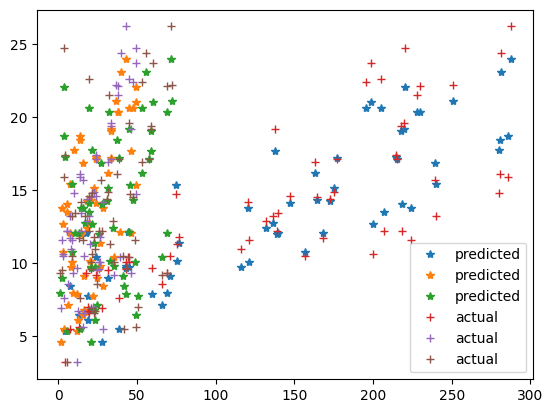

In [34]:
plt.plot(x_test,y_predict,'*',label='predicted')
plt.plot(x_test,y_test,'+',label='actual')
plt.legend()
plt.show()

<b>Homoscedasticity</b>

In [38]:
y_residual=y_predict-y_test

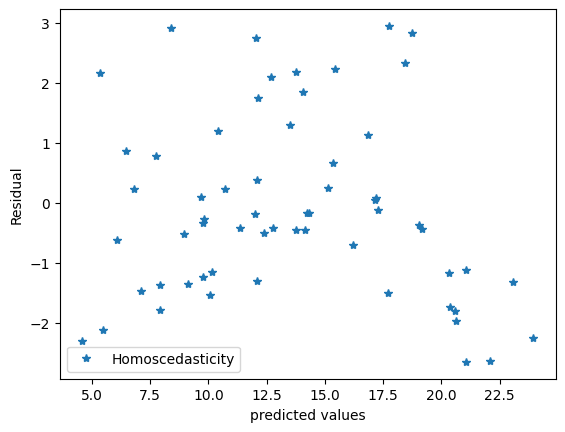

In [63]:
#plt.plot(y_predict,y_residual,'*',label='Homoscedasticity')
plt.plot(y_predict,y_residual,marker='*',linestyle='',label='Homoscedasticity')
plt.legend()
plt.xlabel('predicted values')
plt.ylabel('Residual')
plt.show()

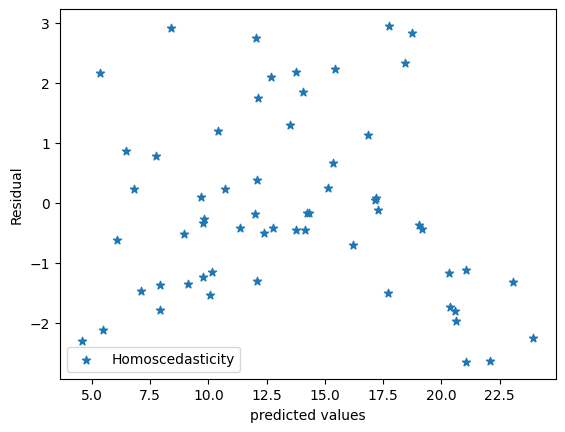

In [60]:
plt.scatter(y_predict,y_residual,marker='*',label='Homoscedasticity')
plt.legend()
plt.xlabel('predicted values')
plt.ylabel('Residual')
plt.show()

Both the above codes gives the same plot

Property of homoscedasticity is satisfied. That is there is no defined realtion ship between residuals and predicted values

<b>Normality in residuals</b>

In [39]:
import seaborn as sns

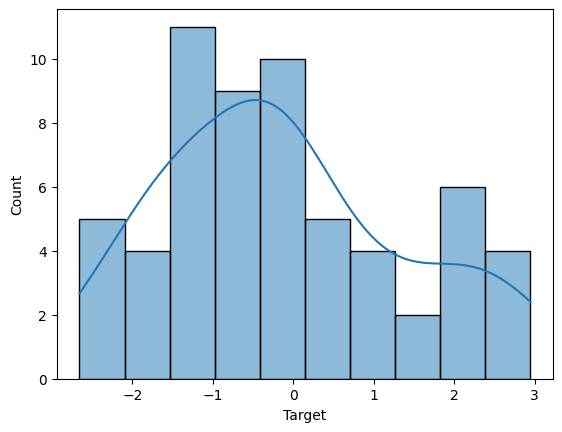

In [65]:
sns.histplot(y_residual,kde=True,bins=10)
#we cannot use distplot for plotting distribution curve because that function is deprecated. so we used histplot with kde=True 
#which represents the distribution curve
plt.show()

From the above, we can say that the distribution curve is almost a normal dist curve. which implies that less error is observed

So there for we can say that the model is following all the linear model assumptions and is absolutely fine to use linear regression model for predicting output for this data set